# 初始化

In [0]:
#@markdown - **挂载** 
from google.colab import drive
drive.mount('GoogleDrive')

In [0]:
# #@markdown - **卸载**
# !fusermount -u GoogleDrive

# 代码区

In [0]:
#@title 决策树 { display-mode: "both" }
# Decision tree
# 该程序用于实现决策树对随机生成数据的分类
from sklearn import tree
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from mpl_toolkits.mplot3d import Axes3D


In [0]:
#@markdown - **绑定数据**
class Bunch(dict):  
	def __init__(self,*args,**kwds):  
		super(Bunch,self).__init__(*args,**kwds)  
		self.__dict__ = self

In [0]:
#@markdown - **生成带标签的随机数据**
def generate_random(sigma, N, mu1=[15., 25., 10], mu2=[30., 40., 30], mu3=[25., 10., 20], mu4=[40., 30., 40]):  
	c = sigma.shape[-1]        #生成N行c维的随机测试数据，比较kmeans与decision tree
	X = np.zeros((N, c))       # 初始化X，2行N列。2维数据，N个样本 
	target = np.zeros((N,1))
	for i in range(N):  
		if np.random.random(1) < 0.25:  # 生成0-1之间随机数  
			X[i, :]  = np.random.multivariate_normal(mu1, sigma[0, :, :], 1)     #用第一个高斯模型生成2维数据  
			target[i] = 1
		elif 0.25 <= np.random.random(1) < 0.5:  
			X[i, :] = np.random.multivariate_normal(mu2, sigma[1, :, :], 1)      #用第二个高斯模型生成2维数据  
			target[i] = 2
		elif 0.5 <= np.random.random(1) < 0.75:  
			X[i, :] = np.random.multivariate_normal(mu3, sigma[2, :, :], 1)      #用第三个高斯模型生成2维数据  
			target[i] = 3
		else:  
			X[i, :] = np.random.multivariate_normal(mu4, sigma[3, :, :], 1)      #用第四个高斯模型生成2维数据  
			target[i] = 4
	return X, target	

In [0]:
k, N = 4, 400
# 初始化方差，生成样本与标签
sigma = np.zeros((k, 3, 3))
for i in range(k):
	sigma[i, :, :] = np.diag(np.random.randint(10, 25, size=(3, )))
sample, target = generate_random(sigma, N)
feature_names = ['x_label', 'y_label', 'z_label'] # 特征数
target_names = ['gaussian1', 'gaussian2', 'gaussian3', 'gaussian4'] # 类别
data = Bunch(sample=sample, feature_names=feature_names, target=target, target_names=target_names)

In [0]:
#@markdown - **训练及保存模型**
#@markdown - **[sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)**
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None) #决策树分类器
clf = clf.fit(data.sample, data.target)
# joblib.dump(clf, 'GoogleDrive/My Drive/Models/model_dt.pkl') # 存储生成的模型
# model = joblib.load('GoogleDrive/My Drive/Models/model_dt.pkl')

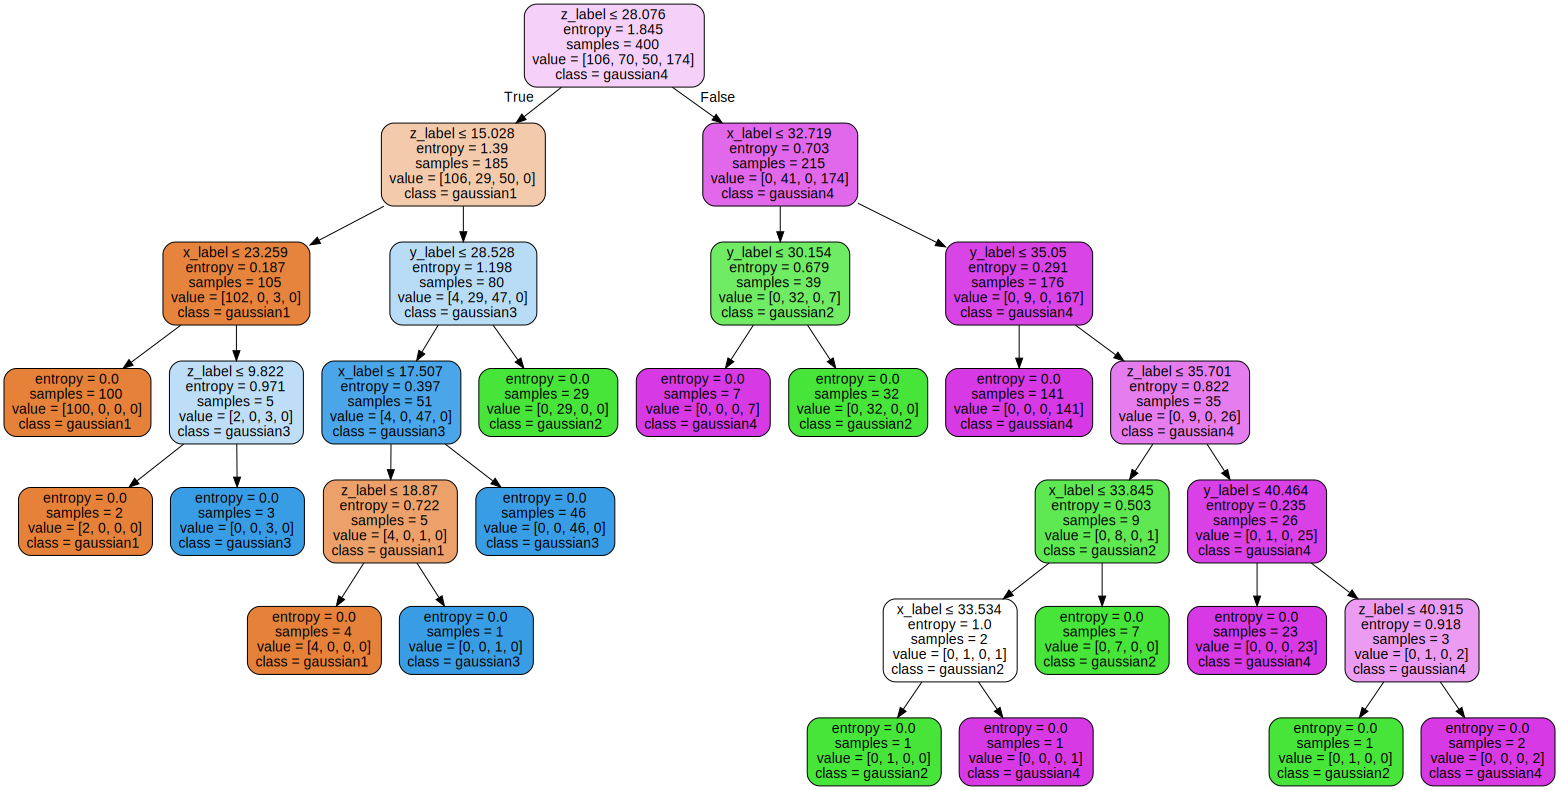

In [6]:
dot_data = tree.export_graphviz(clf,out_file=None, #定义dot_data的属性
					feature_names=data.feature_names,  
					class_names=data.target_names,  
					filled=True, rounded=True,  
					special_characters=True)
graph = graphviz.Source(dot_data) #根据dot_data由graphviz生成字符数据
graph.render("data") #存储dot数据与pdf文件
f = open('data') #读取已存储的dot数据并用graph显示
txt = f.read()
graph = graphviz.Source(txt)
graph

In [0]:
#@markdown - **计算每类的中心**
data_t, _ = generate_random(sigma, N)
tar_pre = clf.predict(data_t) - 1
mu_data_t = np.zeros((4, 3))
for j in range(4): 
	num = 0
	for m, i in enumerate(tar_pre):
		if i == j:
			mu_data_t[j, :] += data_t[m, :]
			num += 1.
	mu_data_t[j, :] = mu_data_t[j, :] / num

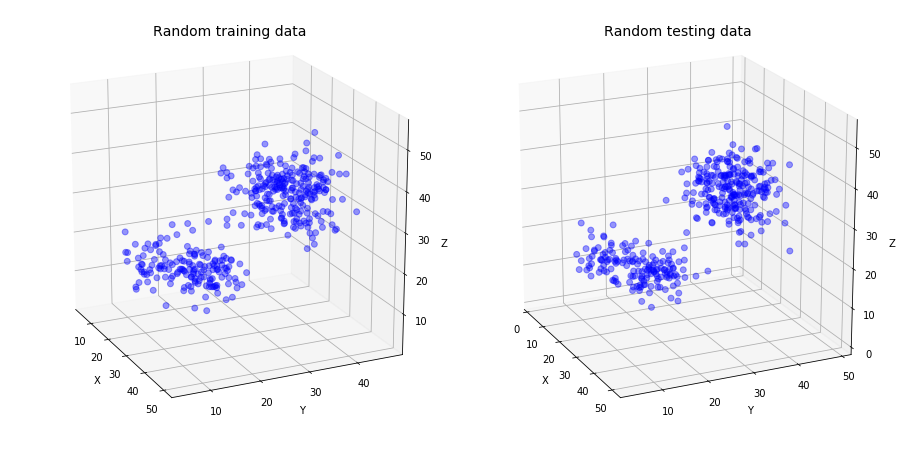

In [8]:
#@markdown - **显示训练，测试数据的分布**
titles = ['Random training data', 'Random testing data']
DATA = [data.sample, data_t]
fig = plt.figure(1, figsize=(16, 8))
fig.subplots_adjust(wspace=.01, hspace=.02)
for i, title, data_n in zip([1, 2], titles, DATA):
	ax = fig.add_subplot(1, 2, i, projection='3d')
	ax.scatter(data_n[:,0],data_n[:,1],data_n[:,2],c='b',s=35,alpha=0.4,marker='o')
	ax.set_xlabel('X')
	ax.set_ylabel('Y')
	ax.set_zlabel('Z')
	ax.view_init(elev=20.,azim=-25)
	ax.set_title(title,fontsize=14)

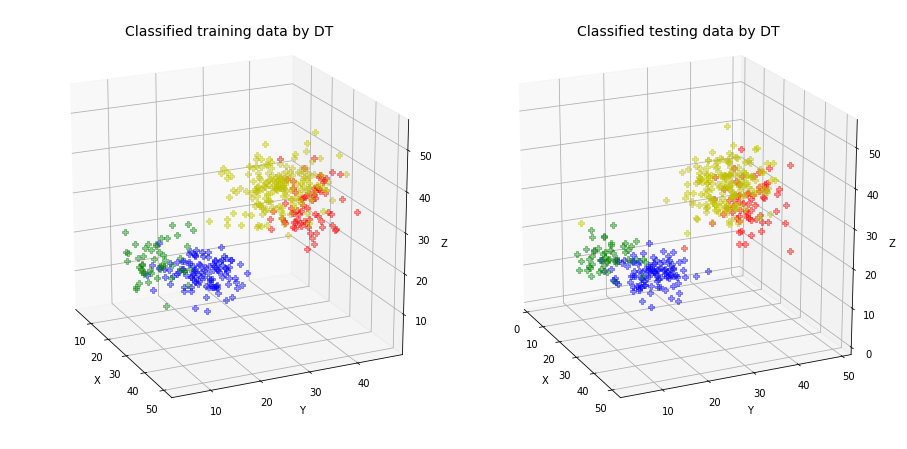

In [9]:
#@markdown - **显示决策树对训练，测试数据的分类情况**
titles = ['Classified training data by DT', 'Classified testing data by DT']
TAR = [np.array(clf.predict(data.sample) - 1, dtype=np.uint8), 
		np.array(clf.predict(data_t) - 1, dtype=np.uint8)]
fig = plt.figure(2, figsize=(16, 8))
fig.subplots_adjust(wspace=.01, hspace=.02)
for i, title, data_n, tar in zip([1, 2], titles, DATA, TAR):
	ax = fig.add_subplot(1, 2, i, projection='3d')
	color=['b','r','g','y']
	for j in range(N):
		ax.scatter(data_n[j, 0], data_n[j, 1], data_n[j, 2], c=color[tar[j]], s=35, alpha=0.4, marker='P')
	ax.set_xlabel('X')
	ax.set_ylabel('Y')
	ax.set_zlabel('Z')
	ax.view_init(elev=20., azim=-25)
	ax.set_title(title, fontsize=14)